<p><font size="6"><b>Visualization - Matplotlib</b></font></p>

> *© 2025, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

# Matplotlib

[Matplotlib](http://matplotlib.org/) is a Python package used widely throughout the scientific Python community to produce high quality 2D publication graphics. It transparently supports a wide range of output formats including PNG (and other raster formats), PostScript/EPS, PDF and SVG and has interfaces for all of the major desktop GUI (graphical user interface) toolkits. It is a great package with lots of options.

However, matplotlib is...

> The 800-pound gorilla — and like most 800-pound gorillas, this one should probably be avoided unless you genuinely need its power, e.g., to make a **custom plot** or produce a **publication-ready** graphic.

> (As we’ll see, when it comes to statistical visualization, the preferred tack might be: “do as much as you easily can in your convenience layer of choice [nvdr e.g. directly from Pandas, or with seaborn], and then use matplotlib for the rest.”)

(quote used from [this](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/) blogpost)

And that's we mostly did, just use the `.plot` function of Pandas. So, why do we learn matplotlib? Well, for the *...then use matplotlib for the rest.*; at some point, somehow!

Matplotlib comes with a convenience sub-package called ``pyplot`` which, for consistency with the wider matplotlib community, should always be imported as ``plt``:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## - dry stuff - The matplotlib `Figure`, `Axes` and `Axis`

At the heart of **every** plot is the figure object. The "Figure" object is the top level concept which can be drawn to one of the many output formats, or simply just to screen. Any object which can be drawn in this way is known as an "Artist" in matplotlib.

Lets create our first artist using pyplot, and then show it:

In [2]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

On its own, drawing the figure artist is uninteresting and will result in an empty piece of paper (that's why we didn't see anything above).

By far the most useful artist in matplotlib is the **Axes** artist. The Axes artist represents the "data space" of a typical plot, a rectangular axes (the most common, but not always the case, e.g. polar plots) will have 2 (confusingly named) **Axis** artists with tick labels and tick marks.

![](../img/matplotlib_fundamentals.png)

There is no limit on the number of Axes artists which can exist on a Figure artist. Let's go ahead and create a figure with a single Axes artist, and show it using pyplot:

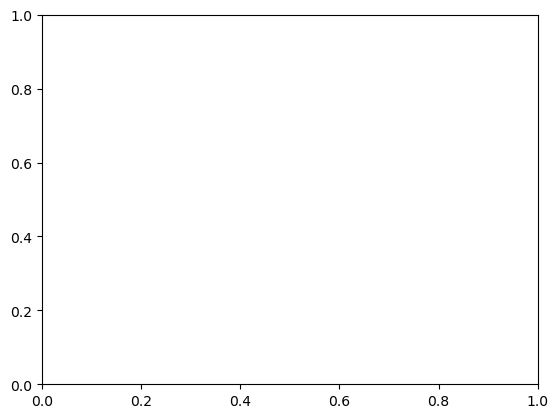

In [3]:
ax = plt.axes()

Matplotlib's ``pyplot`` module makes the process of creating graphics easier by allowing us to skip some of the tedious Artist construction. For example, we did not need to manually create the Figure artist with ``plt.figure`` because it was implicit that we needed a figure when we created the Axes artist.

Under the hood matplotlib still had to create a Figure artist, its just we didn't need to capture it into a variable.

## - essential stuff - `pyplot` versus Object based

Some example data:

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

Observe the following difference:

**1. pyplot style: plt.** (you will see this a lot for code online!)

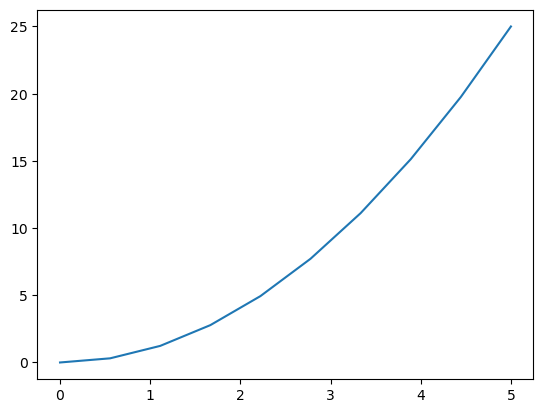

In [5]:
ax = plt.plot(x, y, '-')

**2. object oriented**

In [6]:
from matplotlib import ticker

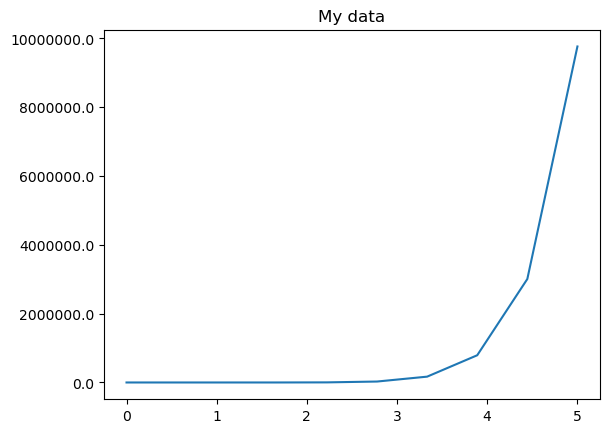

In [7]:
x = np.linspace(0, 5, 10)
y = x ** 10

fig, ax = plt.subplots()
ax.plot(x, y, '-')
ax.set_title("My data")

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))

Although a little bit more code is involved, the advantage is that we now have **full control** of where the plot axes are placed, and we can easily add more than one axis to the figure:

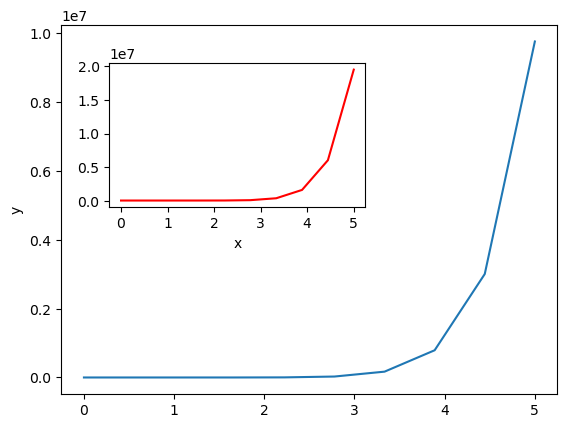

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(x, y, '-')
ax1.set_ylabel('y')

ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
ax2.set_xlabel('x')
ax2.plot(x, y*2, 'r-')

And also Matplotlib advices the object oriented style:

![](../img/matplotlib_oo.png)

<div class="alert alert-info" style="font-size:18px">

<b>REMEMBER</b>:

 <ul>
  <li>Use the <b>object oriented</b> power of Matplotlib</li>
  <li>Get yourself used to writing <code>fig, ax = plt.subplots()</code></li>
</ul>
</div>

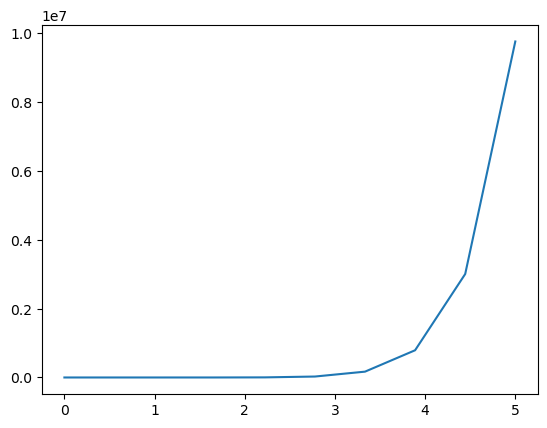

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, '-')
# ...

## A small cheat-sheet reference for some common elements

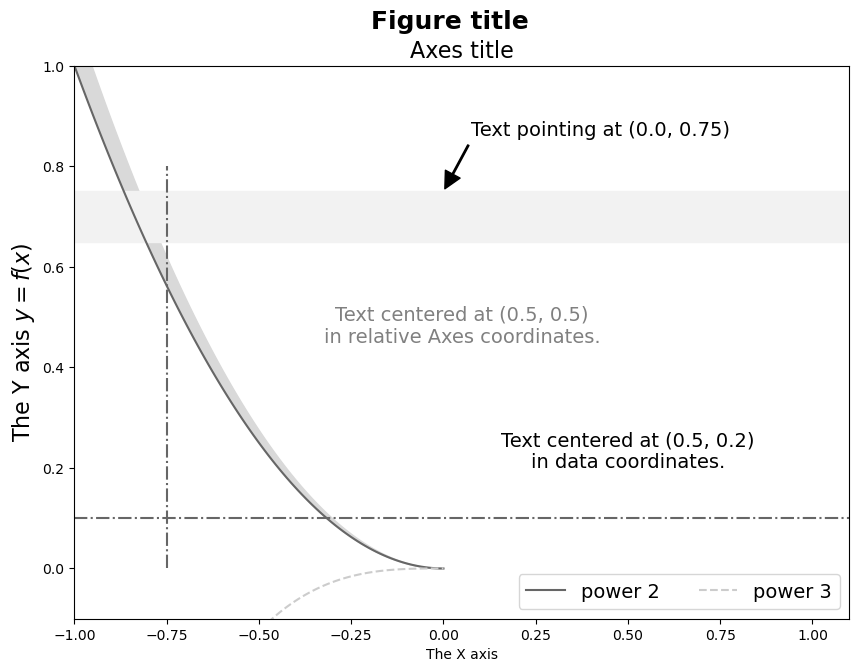

In [10]:
x = np.linspace(-1, 0, 100)

fig, ax  = plt.subplots(figsize=(10, 7))

# Adjust the created axes so that its topmost extent is 0.8 of the figure.
fig.subplots_adjust(top=0.9)

ax.plot(x, x**2, color='0.4', label='power 2')
ax.plot(x, x**3, color='0.8', linestyle='--', label='power 3')

ax.vlines(x=-0.75, ymin=0., ymax=0.8, color='0.4', linestyle='-.')  # vertical dotted line within range [0, 0.8]
ax.fill_between(x=x, y1=x**2, y2=1.1*x**2, color='0.85')   # color fill between the two exponential functions

ax.axhline(y=0.1, color='0.4', linestyle='-.')   # ax-wide horizontal dotted line 
ax.axhspan(ymin=0.65, ymax=0.75, color='0.95')   # ax-wide horizontal filled space

fig.suptitle('Figure title', fontsize=18, 
             fontweight='bold')
ax.set_title('Axes title', fontsize=16)

ax.set_xlabel('The X axis')
ax.set_ylabel('The Y axis $y=f(x)$', fontsize=16)

ax.set_xlim(-1.0, 1.1)
ax.set_ylim(-0.1, 1.)

ax.text(0.5, 0.2, 'Text centered at (0.5, 0.2)\nin data coordinates.',
        horizontalalignment='center', fontsize=14)

ax.text(0.5, 0.5, 'Text centered at (0.5, 0.5)\nin relative Axes coordinates.',
        horizontalalignment='center', fontsize=14, 
        transform=ax.transAxes, color='grey')

ax.annotate('Text pointing at (0.0, 0.75)', xy=(0.0, 0.75), xycoords="data",
            xytext=(20, 40), textcoords="offset points",
            horizontalalignment='left', fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1))

ax.legend(loc='lower right', frameon=True, ncol=2, fontsize=14)

Adjusting specific parts of a plot is a matter of accessing the correct element of the plot:

<img src="https://matplotlib.org/stable/_images/anatomy.png" width="600"/>

For more information on legend positioning, check [this post](http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot) on stackoverflow!

## Exercises

For these exercises we will use some random generated example data (as a Numpy array), representing daily measured values:

In [11]:
data = np.random.randint(-2, 3, 100).cumsum()
data

array([ -2,  -3,  -2,   0,   1,  -1,   0,   1,   2,   2,   0,  -1,  -1,
        -1,  -3,  -1,  -2,  -2,  -4,  -5,  -5,  -5,  -4,  -6,  -8,  -9,
       -10, -11, -13, -14, -12, -13, -11, -13, -12, -13, -12, -11, -12,
       -14, -13, -11, -10,  -9,  -8,  -9, -10, -12, -13, -12, -14, -15,
       -16, -17, -15, -16, -17, -15, -13, -12, -10,  -8, -10,  -9,  -8,
       -10,  -8,  -7,  -9,  -8,  -9,  -8,  -8,  -9,  -9, -11, -13, -15,
       -16, -15, -14, -15, -16, -16, -16, -17, -17, -15, -16, -18, -16,
       -16, -14, -15, -17, -19, -17, -17, -18, -16])

<div class="alert alert-success">

**EXERCISE**

Make a line chart of the `data` using Matplotlib. The figure should be 12 (width) by 4 (height) in inches. Make the line color 'darkgrey' and provide an x-label ('days since start') and a y-label ('measured value').
    
Use the object oriented approach to create the chart.

<details><summary>Hints</summary>

- When Matplotlib only receives a single input variable, it will interpret this as the variable for the y-axis
- Check the cheat sheet above for the functions.

</details>

</div>

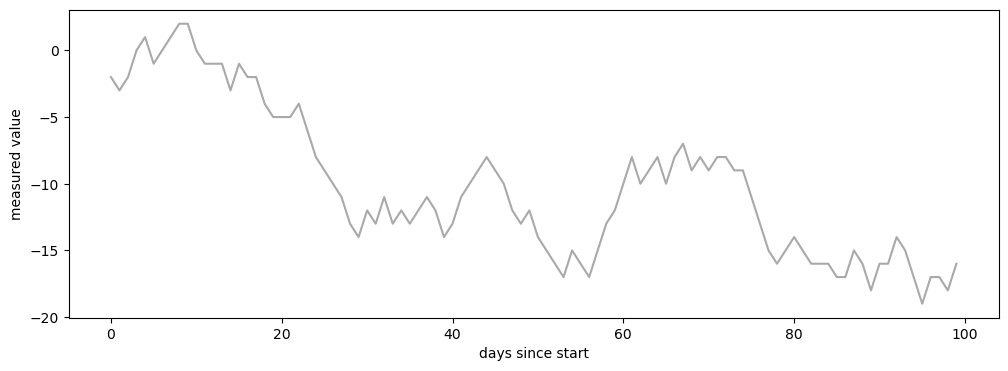

In [12]:
fig, ax  = plt.subplots(figsize=(12, 4))

ax.plot(data, color='darkgrey')
ax.set_xlabel('days since start');
ax.set_ylabel('measured value');

<div class="alert alert-success">

**EXERCISE**

The data represents each a day starting from Jan 1st 2021. Create an array (variable name `dates`) of the same length as the original data (length 100) with the corresponding dates ('2021-01-01', '2021-01-02',...). Create the same chart as in the previous exercise, but use the `dates` values for the x-axis data.
    
Mark the region inside `[-5, 5]` with a green color to show that these values are within an acceptable range.

<details><summary>Hints</summary>

- As seen in notebook `pandas_04_time_series_data`, Pandas provides a useful function `pd.date_range` to create a set of datetime values. In this case 100 values with `freq="D"`.
- Make sure to understand the difference between `axhspan` and `fill_between`, which one do you need?
- When adding regions, adding an `alpha` level is mostly a good idea.

</details>

</div>

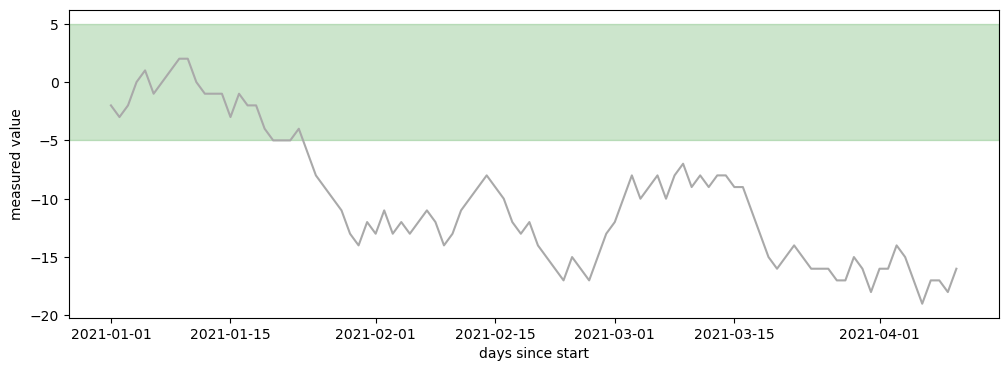

In [13]:
dates = pd.date_range("2021-01-01", periods=100, freq="D")

fig, ax  = plt.subplots(figsize=(12, 4))

ax.plot(dates, data, color='darkgrey')
ax.axhspan(ymin=-5, ymax=5, color='green', alpha=0.2)

ax.set_xlabel('days since start');
ax.set_ylabel('measured value');

<div class="alert alert-success">

**EXERCISE**

Compare the __last ten days__ ('2021-04-01' till '2021-04-10') in a bar chart using darkgrey color. For the data on '2021-04-01', use an orange bar to highlight the measurement on this day.

<details><summary>Hints</summary>

- Select the last 10 days from the `data` and `dates` variable, i.e. slice [-10:].
- Similar to a `plot` method, Matplotlib provides a `bar` method.
- By plotting a single orange bar on top of the grey bars with a second bar chart, that one is highlithed.

</details>

</div>

<BarContainer object of 1 artists>

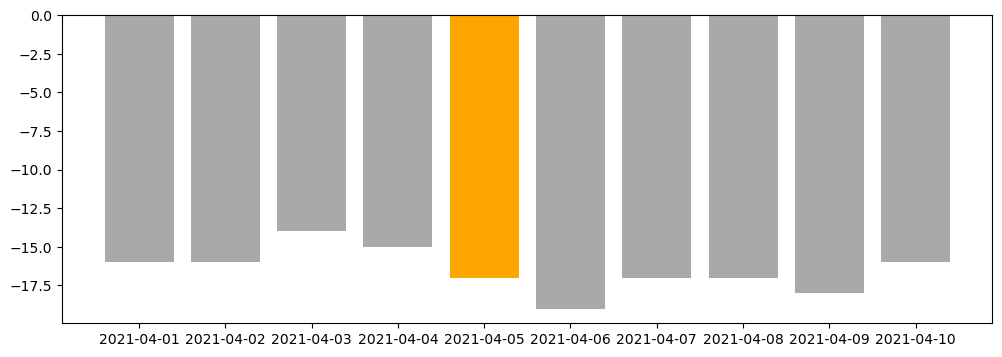

In [14]:
fig, ax  = plt.subplots(figsize=(12, 4))

ax.bar(dates[-10:], data[-10:], color='darkgrey')
ax.bar(dates[-6], data[-6], color='orange')

## I do not like the style...

**...understandable**

Matplotlib had a bad reputation in terms of its default styling as figures created with earlier versions of Matplotlib were very Matlab-lookalike and mostly not really catchy. 

Since Matplotlib 2.0, this has changed: https://matplotlib.org/users/dflt_style_changes.html!

However...
> *Des goûts et des couleurs, on ne discute pas...*

(check [this link](https://fr.wiktionary.org/wiki/des_go%C3%BBts_et_des_couleurs,_on_ne_discute_pas) if you're not french-speaking)

To account different tastes, Matplotlib provides a number of styles that can be used to quickly change a number of settings:

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

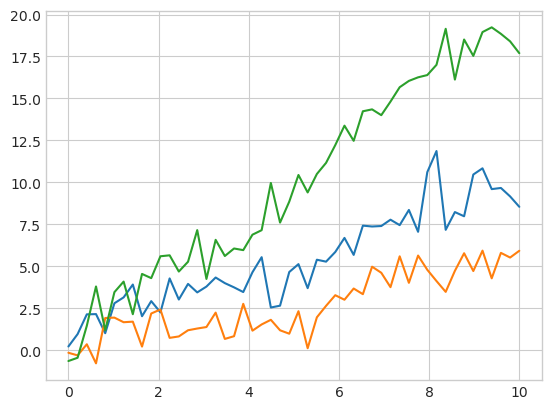

In [16]:
x = np.linspace(0, 10)

with plt.style.context('seaborn-v0_8-whitegrid'):  # 'seaborn-v0_8', ggplot', 'bmh', 'grayscale'
    fig, ax = plt.subplots()
    ax.plot(x, np.sin(x) + x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
    ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))

We should not start discussing about colors and styles, just pick **your favorite style**!

In [17]:
plt.style.use('seaborn-v0_8')

or go all the way and define your own custom style, see the [official documentation](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html) or [this tutorial](https://colcarroll.github.io/yourplotlib/#/).

<div class="alert alert-info">

<b>REMEMBER</b>:

* If you just want **quickly a good-looking plot**, use one of the available styles (`plt.style.use('...')`)
* Otherwise, creating `Figure` and `Axes` objects makes it possible to change everything!

</div>

## Advanced subplot configuration

The function to setup a Matplotlib Figure we have seen up to now,  `fig, ax = plt.subplots()`, supports creating both a single plot and multiple subplots with a regular number of rows/columns:

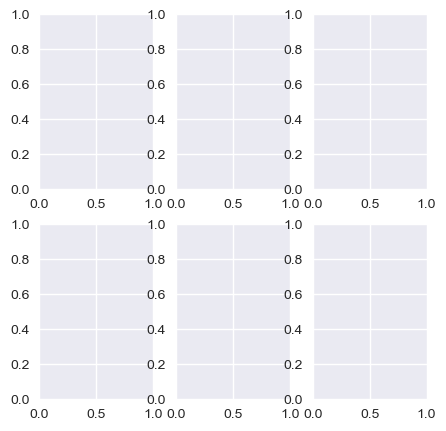

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(5, 5))

A typical issue when plotting multiple elements in the same Figure is the overlap of the subplots. A straight-forward approach is using a larger Figure size, but this is not always possible and does not make the content independent from the Figure size. Matplotlib provides the usage of a [__constrained-layout__](https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html) to fit plots within your Figure cleanly.

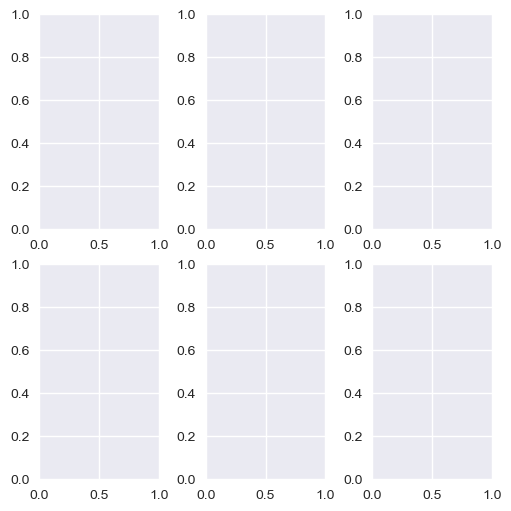

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(5, 5), constrained_layout=True)

When more advanced layout configurations are required, the usage of the [gridspec](https://matplotlib.org/stable/api/gridspec_api.html#module-matplotlib.gridspec) module is a good reference. See [gridspec demo](https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#sphx-glr-gallery-userdemo-demo-gridspec03-py) for more information. A useful shortcut to know about is the [__string-shorthand__](https://matplotlib.org/stable/tutorials/provisional/mosaic.html#string-short-hand) to setup subplot layouts in a more intuitive way, e.g.

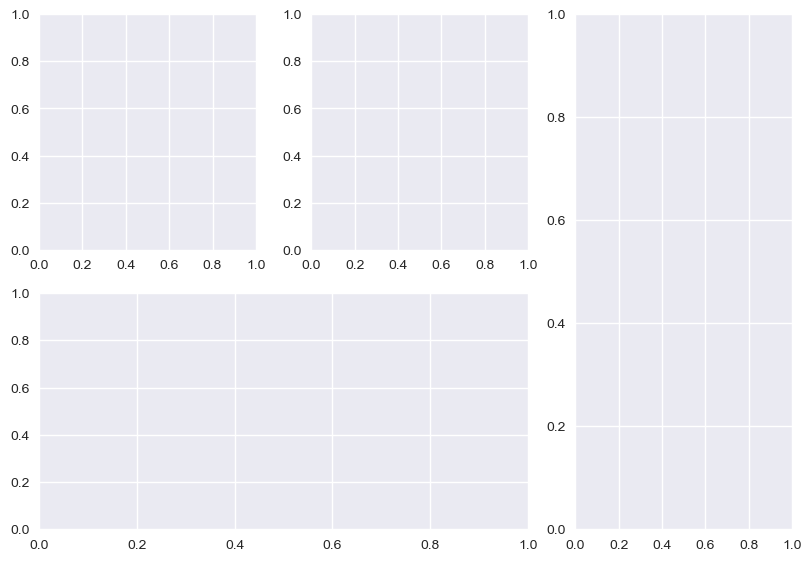

In [20]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    """
    ABD
    CCD
    """
)
axd;

## Interaction with Pandas

What we have been doing while plotting with Pandas:

In [21]:
import pandas as pd

In [22]:
flowdata = pd.read_csv('data/vmm_flowdata.csv', 
                       index_col='Time', 
                       parse_dates=True)

<Axes: xlabel='Time'>

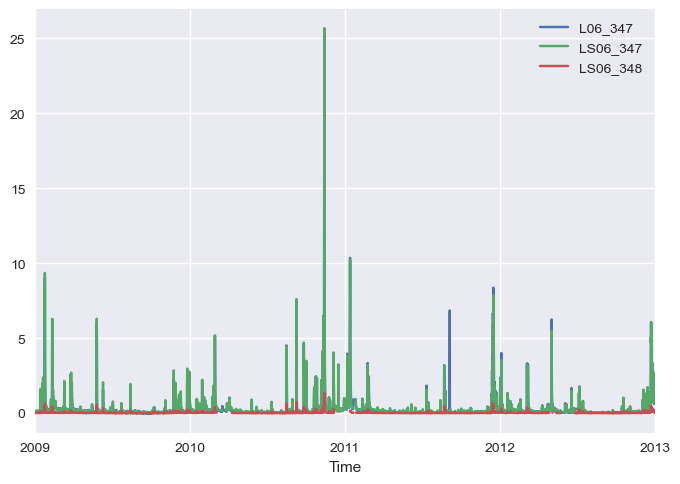

In [23]:
flowdata.plot.line()  # remark default plot() is a line plot

Under the hood, it creates an Matplotlib Figure with an Axes object.

### Pandas versus matplotlib

#### Comparison 1: single plot

<Axes: xlabel='Time', ylabel='Discharge m3/s'>

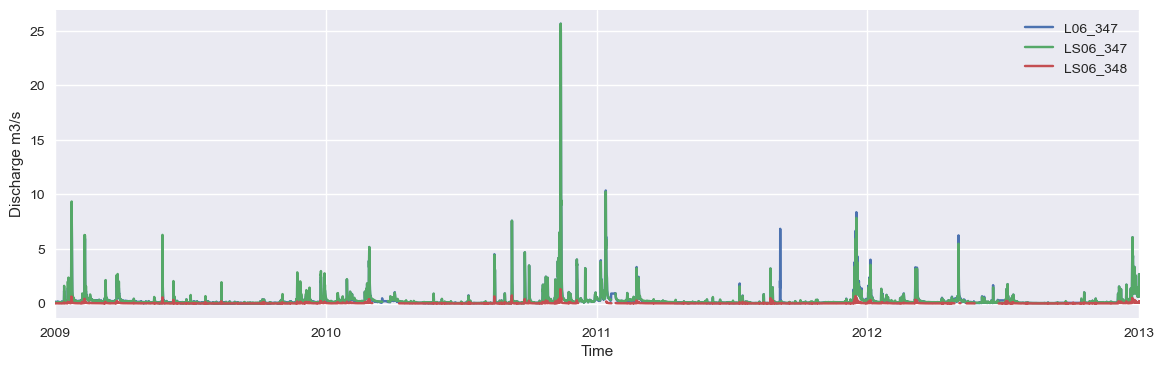

In [24]:
flowdata.plot(figsize=(14, 4), ylabel="Discharge m3/s") # SHIFT + TAB this!

Making this with matplotlib...

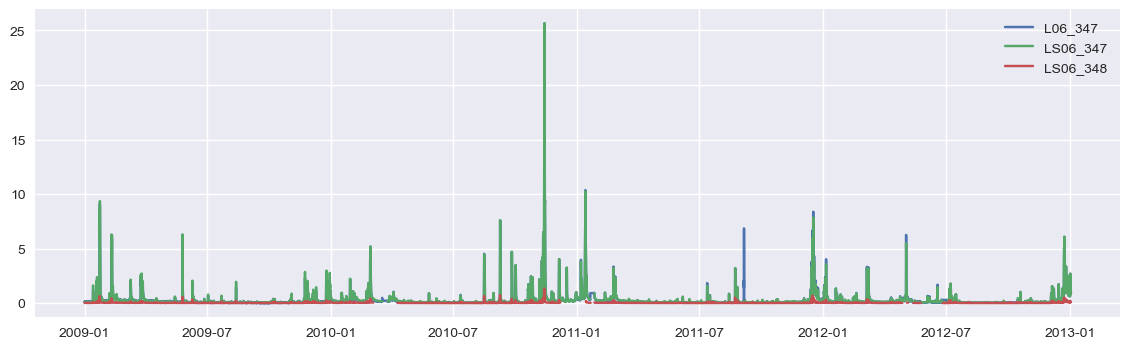

In [25]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(flowdata)
ax.legend(["L06_347", "LS06_347", "LS06_348"])

is still ok!

#### Comparison 2: with subplots

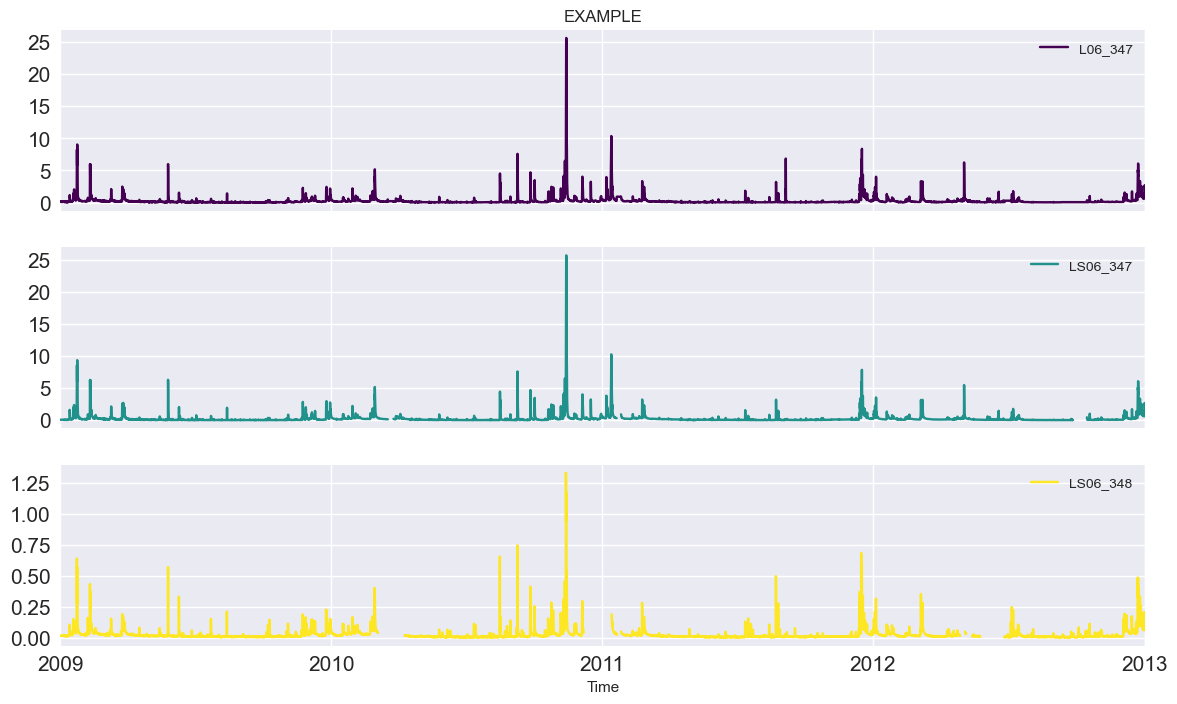

In [26]:
axs = flowdata.plot(subplots=True, sharex=True,
                    figsize=(14, 8), colormap='viridis', # Dark2
                    fontsize=15, rot=0)
axs[0].set_title("EXAMPLE");

Mimicking this in matplotlib (just as a reference, it is basically what Pandas is doing under the hood):

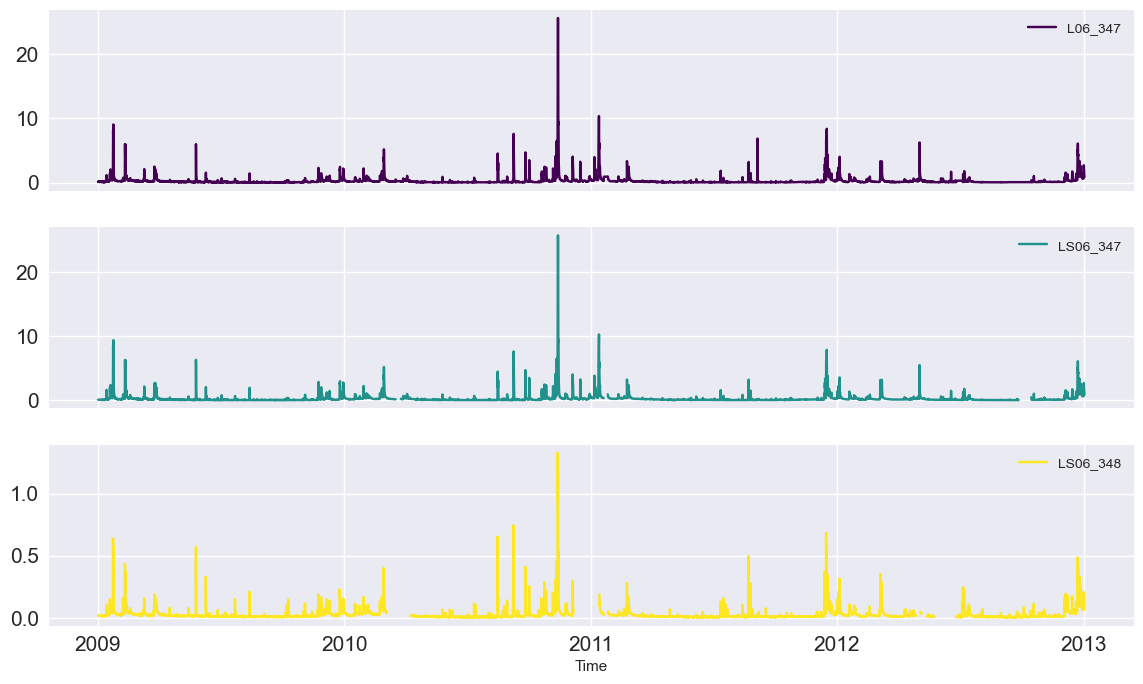

In [27]:
from matplotlib import cm
import matplotlib.dates as mdates

colors = [cm.viridis(x) for x in np.linspace(0.0, 1.0, len(flowdata.columns))] # list comprehension to set up the colors

fig, axs = plt.subplots(3, 1, figsize=(14, 8))

for ax, col, station in zip(axs, colors, flowdata.columns):
    ax.plot(flowdata.index, flowdata[station], label=station, color=col)
    ax.legend()
    if not ax.get_subplotspec().is_last_row():
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_major_locator(mdates.YearLocator())
    else:
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_xlabel('Time')
    ax.tick_params(labelsize=15)

Is already a bit harder ;-). Pandas provides as set of default configurations on top of Matplotlib.

### Best of both worlds...

<Axes: xlabel='Time'>

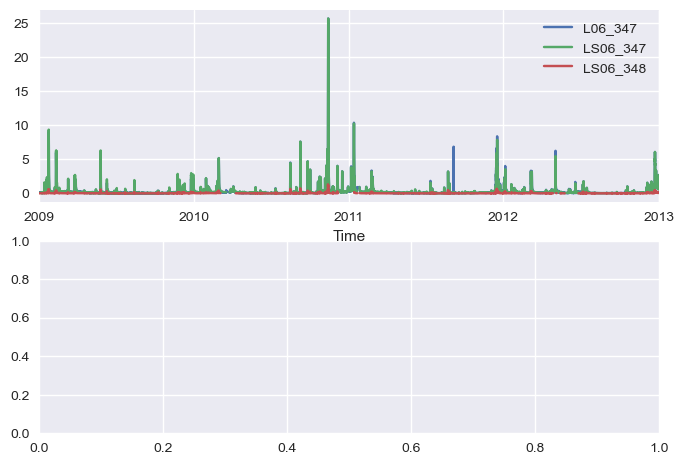

In [28]:
fig, (ax0, ax1) = plt.subplots(2, 1) #prepare a Matplotlib figure

flowdata.plot(ax=ax0) # use Pandas for the plotting

Text(0.5, 0.98, 'Flow station time series')

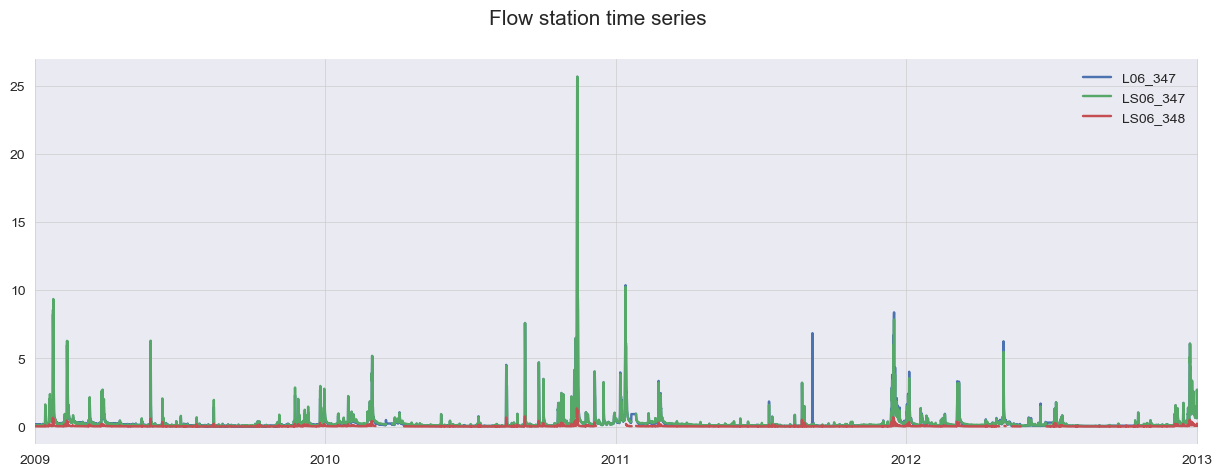

In [29]:
fig, ax = plt.subplots(figsize=(15, 5)) #prepare a matplotlib figure

flowdata.plot(ax=ax) # use pandas for the plotting

# Provide further adaptations with matplotlib:
ax.set_xlabel("")
ax.grid(which="major", linewidth='0.5', color='0.8')
fig.suptitle('Flow station time series', fontsize=15)

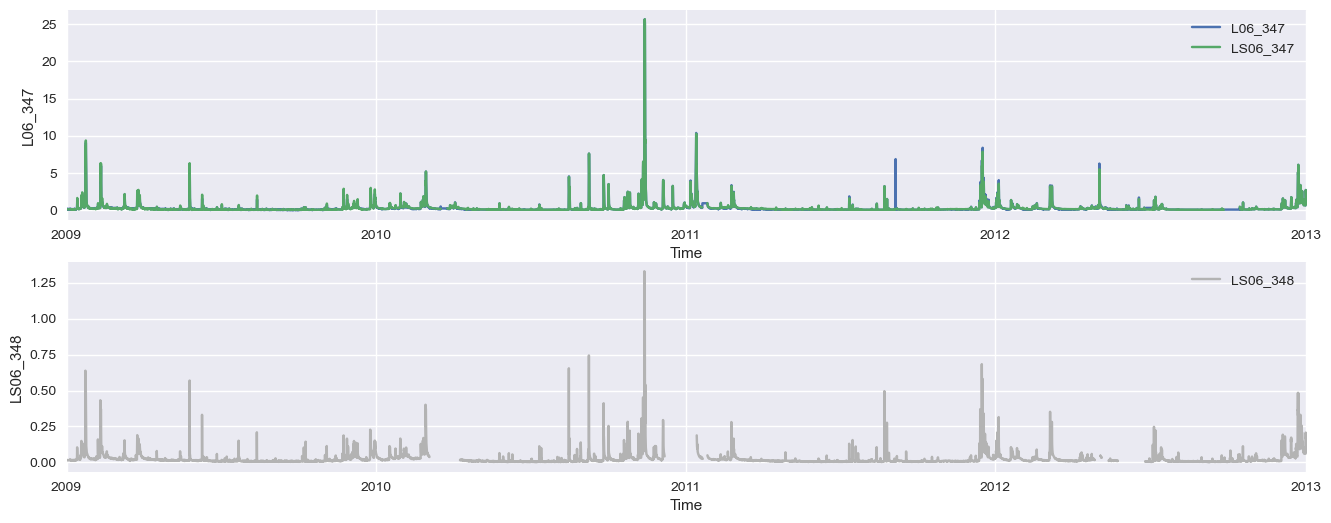

In [30]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(16, 6)) #provide with matplotlib 2 axis

flowdata[["L06_347", "LS06_347"]].plot(ax=ax0) # plot the two timeseries of the same location on the first plot
flowdata["LS06_348"].plot(ax=ax1, color='0.7') # plot the other station on the second plot

# further adapt with matplotlib
ax0.set_ylabel("L06_347")
ax1.set_ylabel("LS06_348")
ax1.legend()

<div class="alert alert-info">

 <b>Remember</b>: 

* You can do anything with matplotlib, but at a cost... <a href="http://stackoverflow.com/questions/tagged/matplotlib">stackoverflow</a>
* The preformatting of Pandas provides mostly enough flexibility for quick analysis and draft reporting. It is not for paper-proof figures or customization

If you take the time to make your perfect/spot-on/greatest-ever matplotlib-figure: Make it a <b>reusable function</b>!
    
`fig.savefig()` to save your Figure object!    

</div>

## Exercise

In [31]:
flowdata = pd.read_csv('data/vmm_flowdata.csv', 
                       index_col='Time', 
                       parse_dates=True)

In [32]:
flowdata.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


<div class="alert alert-success">

**EXERCISE**

Pandas supports different types of charts besides line plots, all available from `.plot.xxx`, e.g. `.plot.scatter`, `.plot.bar`,... Make a bar chart to compare the mean discharge in the three measurement stations L06_347, LS06_347, LS06_348. Add a y-label 'mean discharge'. To do so, prepare a Figure and Axes with Matplotlib and add the chart to the created Axes.

<details><summary>Hints</summary>

* You can either use Pandas `ylabel` parameter to set the label or add it with Matploltib `ax.set_ylabel()`
* To link an Axes object with Pandas output, pass the Axes created by `fig, ax = plt.subplots()` as parameter to the Pandas plot function.
</details>

</div>

<Axes: ylabel='mean discharge'>

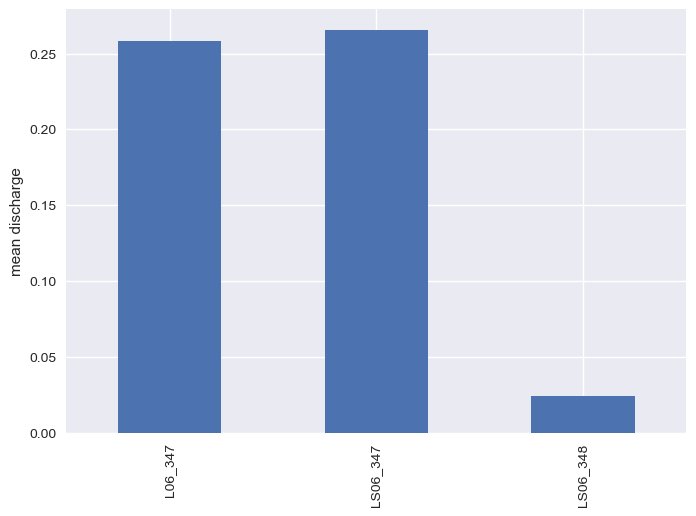

In [33]:
fig, ax = plt.subplots()
flowdata.mean().plot.bar(ylabel="mean discharge", ax=ax)

<div class="alert alert-success">

**EXERCISE**

To compare the stations data, make two subplots next to each other:
    
- In the left subplot, make a bar chart of the minimal measured value for each of the station.
- In the right subplot, make a bar chart of the maximal measured value for each of the station.    

Add a title to the Figure containing 'Minimal and maximal discharge from 2009-01-01 till 2013-01-02'. Extract these dates from the data itself instead of hardcoding it by using Python f-strings ([_formatted string literals_](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals)).

<details><summary>Hints</summary>

- One can directly unpack the result of multiple axes, e.g. `fig, (ax0, ax1) = plt.subplots(1, 2,..` and link each of them to a Pands plot function.
- Remember the remark about `constrained_layout=True` to overcome overlap with subplots?
- A Figure title is called `suptitle` (which is different from an Axes title)
- f-strings ([_formatted string literals_](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals)) is a powerful Python feature (since Python 3.6) to use variables inside a string, e.g. `f"some text with a {variable:HOWTOFORMAT}"` (with the format being optional).
</details>

</div>

Example of the usage of formatting f-strings [_formatted string literals_](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals):

In [34]:
my_float_variable = 3.14159
my_datetime_variable = pd.Timestamp("2022-12-06")
print(f"Adjust the rounding of a float, {my_float_variable} vs {my_float_variable:.2f}")
print(f"Adjust the rounding of a timestamp, {my_datetime_variable} vs {my_datetime_variable:%Y-%m-%d}.")

Adjust the rounding of a float, 3.14159 vs 3.14
Adjust the rounding of a timestamp, 2022-12-06 00:00:00 vs 2022-12-06.


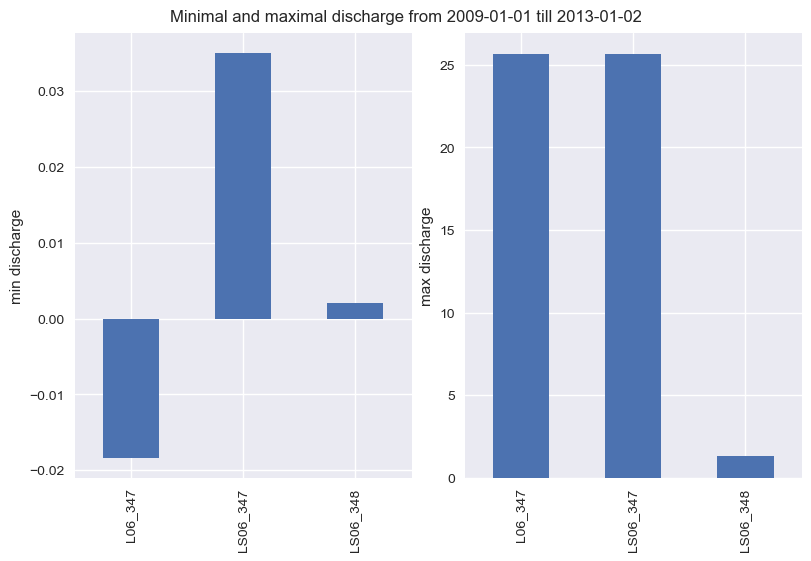

In [35]:
fig, (ax0, ax1) = plt.subplots(1, 2, constrained_layout=True)

flowdata.min().plot.bar(ylabel="min discharge", ax=ax0)
flowdata.max().plot.bar(ylabel="max discharge", ax=ax1)

fig.suptitle(f"Minimal and maximal discharge from {flowdata.index[0]:%Y-%m-%d} till {flowdata.index[-1]:%Y-%m-%d}");

<div class="alert alert-success">

**EXERCISE**

Make a line plot of the discharge measurements in station `LS06_347`. 
    
The main event on November 13th 2010 caused a flood event. To support the reader in the interpretation of the graph, add the following elements:
    
- Add an horizontal red line at 20 m3/s to define the alarm level.
- Add the text 'Alarm level' in red just above the alarm levl line.
- Add an arrow pointing to the main peak in the data (event on November 13th) with the text 'Flood event on 2010-11-13'
    
Check the Matplotlib documentation on [annotations](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html#annotating-plots) for the text annotation

<details><summary>Hints</summary>

- The horizontal line is explained in the cheat sheet in this notebook.
- Whereas `ax.text` would work as well for the 'alarm level' text, the `annotate` method provides easier options to shift the text slightly relative to a data point.
- Extract the main peak event by filtering the data on the maximum value. Different approaches are possible, but the `max()` and `idxmax()` methods are a convenient option in this case.

</details>

</div>

Text(-30, -30, 'Flood event on 2010-11-13')

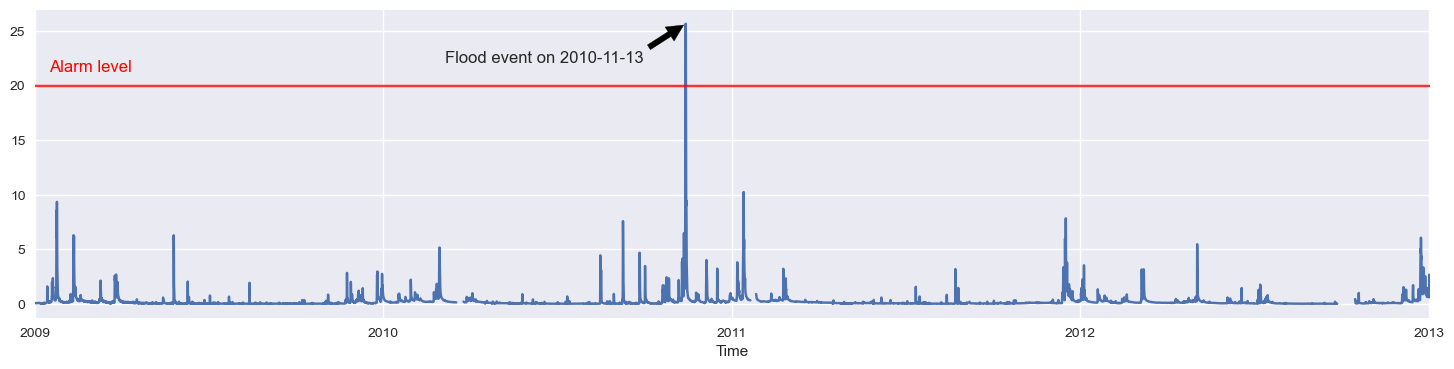

In [36]:
alarm_level = 20
max_datetime, max_value = flowdata["LS06_347"].idxmax(), flowdata["LS06_347"].max()

fig, ax = plt.subplots(figsize=(18, 4))
flowdata["LS06_347"].plot(ax=ax)

ax.axhline(y=alarm_level, color='red', linestyle='-', alpha=0.8)
ax.annotate('Alarm level', xy=(flowdata.index[0], alarm_level), 
            xycoords="data", xytext=(10, 10), textcoords="offset points",
            color="red", fontsize=12)
ax.annotate(f"Flood event on {max_datetime:%Y-%m-%d}",
            xy=(max_datetime, max_value), xycoords='data',
            xytext=(-30, -30), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            fontsize=12)

# Need more matplotlib inspiration?

For more in-depth material:
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/
* notebooks in matplotlib section: http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb#4.-Visualization-with-Matplotlib
* main reference: [matplotlib homepage](http://matplotlib.org/)

<div class="alert alert-info" style="font-size:18px">

**Galleries!**

Galleries are great to get inspiration, see the plot you want, and check the code how it is created:
    
* [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)
* [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [python Graph Gallery](https://python-graph-gallery.com/)

</div>